In [1]:
import import_ipynb
import tumor_identifier as ti
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
import numpy as np
import torch
print(torch.cuda.is_available())


importing Jupyter notebook from Tumor_identifier.ipynb


NameError: name 'tumo' is not defined

# Creating a Test(Dummy model for evaluation)
## Using model.eval() to check

In [12]:
mri_dataset =ti.MRI()
mri_dataset.normalize()
device = ti.torch.device('cuda:0')
model = ti.CNN().to(device)

AttributeError: module 'Tumor_identifier' has no attribute 'MRI'

In [ ]:
dataloader =ti.DataLoader(mri_dataset, batch_size=32, shuffle=False)

In [ ]:
model.eval()
outputs = []
y_true = []
with torch.no_grad():
    for D in dataloader:
        image = D['image'].to(device)
        label = D['label'].to(device)

        y_hat = model(image)

        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())

In [ ]:
outputs = np.concatenate( outputs, axis=0 ).squeeze()
y_true = np.concatenate( y_true, axis=0 ).squeeze()

In [ ]:
def threshold(scores,threshold=0.30, minimum=0, maximum = 1.0):
    x = np.array(list(scores))
    x[x >= threshold] = maximum
    x[x < threshold] = minimum
    return x

In [ ]:
# Calculate metrics
yhat_classes = threshold(outputs)
accuracy = accuracy_score(y_true, yhat_classes)
precision = precision_score(y_true, yhat_classes)
recall = recall_score(y_true, yhat_classes)
f1 = f1_score(y_true, yhat_classes)



In [ ]:
print("Accuracy->",accuracy)
print("Precission->",precision)
print("Recall->",recall)
print("F1 Score->",f1_score)

Accuracy-> 0.6615990990990991
Precission-> 0.6615990990990991
Recall-> 1.0
F1 Score-> <function f1_score at 0x0000022B205D0860>


[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

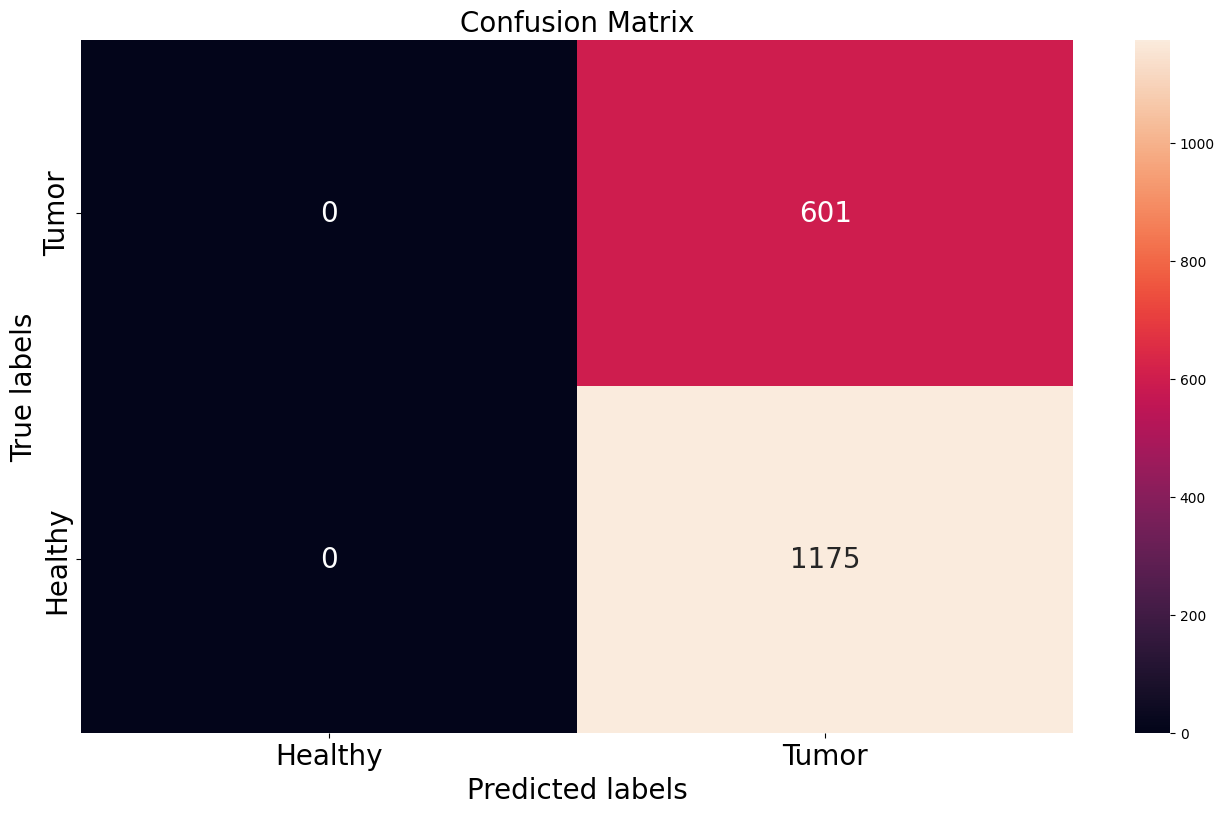

In [ ]:
# a better confusion matrix
import seaborn as sns

ti.plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax= ti.plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 20})

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20) 
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['Healthy','tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['tumor','Healthy'], fontsize=20)

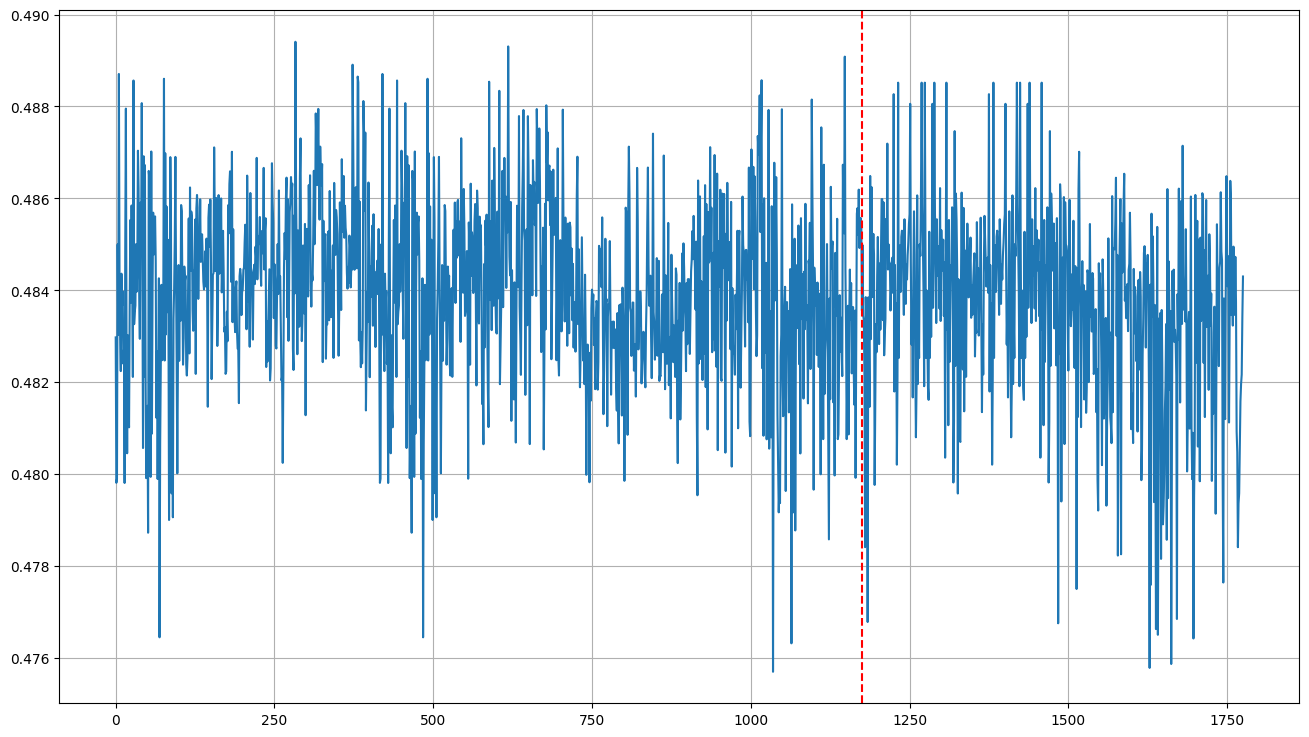

In [ ]:
ti.plt.figure(figsize=(16,9))
ti.plt.plot(outputs)
ti.plt.axvline(x=len(ti.tumor), color='r', linestyle='--')
ti.plt.grid()